# Global AI Hub - Python Bootcamp - Proje 2

(Dataset Linki: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores )

- Verilen datasetle ilgili pandas, numpy ve matplotlib kullanılarak analizlerin elde edildiği bir projedir.

## Kullanılacak Kütüphanelerin Import Edilmesi

In [1]:
import matplotlib.pyplot as plt
import datetime
from collections import OrderedDict
import numpy as np
import pandas as pd

## Verisetinin Okunup Dataframe Çevrilip Analize Hazır Hale Getirilmesi

In [2]:
# encoding changed to ISO-8859-1 because utf-8 is not reading.
netflix_dataframe = pd.read_csv("NetflixOriginals.csv", encoding="ISO-8859-1")
netflix_dataframe

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


## Dataframe Hakkında Bilgi Edinme ve Gerekli Dönüşünlerin Sağlanması

- .info() ile tüm sütunlar hakkında kısaca bilgi edindim.
- Tarih ile ilgili sütun olan Premiere sütununu object yerine date olarak çevirerek tarih olarak kullanılabilir hale getirdim.
- Film süreesi ile ilgili sütun olan Runtime sütununu dakika cinsinden çıkarıp saniye cinsine çevirdim. Yapmamın sebebi dakika olarak toplandığında her 60 dakika 1 saate eşitken her 100 saniye 1 dakika eşittir. Bu yüzden toplama yaparken daha kolay toplanıp sonrasında dakika veya saat cinsine kolaylıkla çevrilebilir.
- Sütun isimlerine istenilen zamanda bakılabilmesi için sütun isimlerinin çıktısını aldım.

In [3]:
netflix_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
netflix_dataframe["Premiere"] = pd.to_datetime(netflix_dataframe["Premiere"]).dt.date
netflix_dataframe["Runtime"] = [i*60 for i in netflix_dataframe["Runtime"]]
netflix_dataframe  # to see changed column's data in dataframe

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,3480,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,4860,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,4740,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,5640,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,5400,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,7500,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,5460,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,9180,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,5340,8.6,Portuguese


In [5]:
# to see column names
netflix_dataframe.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

## 1. Soru, Yapılanlar ve Yorum
### Soru
- Verisetine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
### Yapılanlar
- Slicing ve condition kullanarak uzun metraj sayılan filmleri (minimum 40 dakika olan filmler) bir dataframede topladım.
- Sonrasında da Language sütunu üstünden her bir dilde kaç tane filmin olduğunu .value_counts() metodunu kullanarak saydırdım.
- En sonda görselleştirmesini pasta grafiğiyle yaptım. Daha anlaşılır grafik olması için.

In [6]:
# long films are categorized as minimum 40 minutes.
long_films_dataframe = netflix_dataframe[netflix_dataframe["Runtime"] >= 40]
long_films_dataframe

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,3480,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,4860,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,4740,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,5640,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,5400,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,7500,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,5460,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,9180,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,5340,8.6,Portuguese


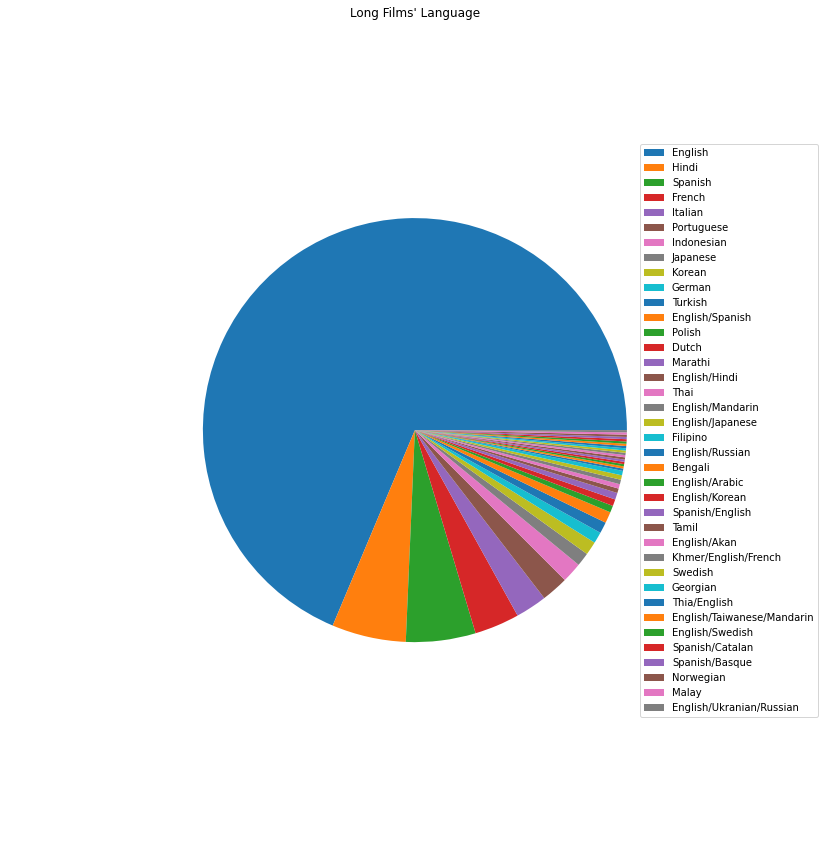

In [48]:
long_film_language_dictionary = dict(long_films_dataframe["Language"].value_counts())
fig = plt.figure(figsize=(15,15))
plt.pie(list(long_film_language_dictionary.values()), radius=0.65)
plt.legend(list(long_film_language_dictionary.keys()), loc="right")
plt.title("Long Films' Language")
plt.xticks(rotation=90)
plt.show()

### Yorum

- İngilizcenin Netflix'de bulunan uzun metrajlı filmler arasında en çok kullanılan dil olduğu görülmektedir. Bunun sebebi hem Netflix'in Amerika'da kurulan bir şirket olması ve sonrasında globale açılması hem de dünya genelinde en çok kullanılan dil olmasından dolayıdır. 
- Sonraki sıralarda gelen Hintçe ve İspanyolca ise yine en çok kullanılan diller arasında bulunmasından dolayı olabilir.

## 2. Soru, Yapılanlar ve Yorum
### Soru
- 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
### Yapılanlar
- İlk olarak Genre sütunu üstünden Documentary türündeki filmleri topladım.
- Daha öncesinde date çevirdiğim Premiere sütunu üstünden 01-01-2019 ile 30-06-2020 tarihleri arasındaki belgesel türündeki filmleri ayırdım. Sonrasında Premiere sütununa göre artan sıralı sıralama yaptım.
- Sonrasında Title sütununu x eksenine aldıkları IMDB Score'larını da y eksenine koyarak her bir filmin ismini ve puanını gösteren scatter grafiği oluşturdum.

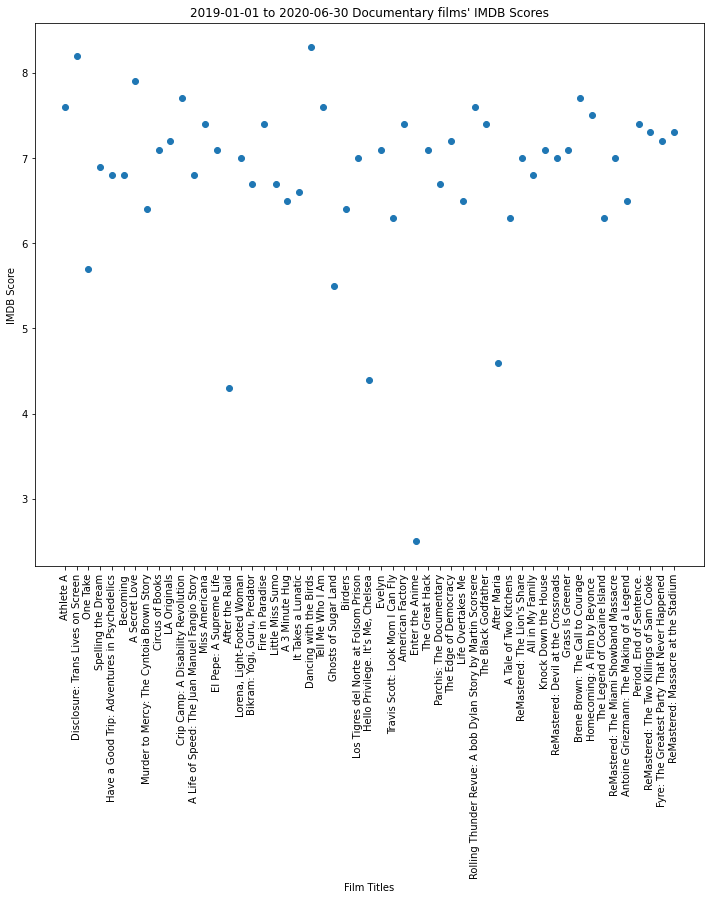

In [8]:
documentary_2019_2020_dataframe = netflix_dataframe[netflix_dataframe["Genre"] == "Documentary"]
first_date = datetime.date(2019,1,1)
second_date = datetime.date(2020,6,30)
documentary_2019_2020_dataframe = documentary_2019_2020_dataframe[documentary_2019_2020_dataframe["Premiere"]>= first_date]
documentary_2019_2020_dataframe = documentary_2019_2020_dataframe[documentary_2019_2020_dataframe["Premiere"]<= second_date]
documentary_2019_2020_dataframe = documentary_2019_2020_dataframe.sort_values("Premiere", ascending=False, ignore_index=True)

fig = plt.figure(figsize=(12,10))
plt.scatter(documentary_2019_2020_dataframe["Title"], documentary_2019_2020_dataframe["IMDB Score"])
plt.title("2019-01-01 to 2020-06-30 Documentary films' IMDB Scores")
plt.xticks(rotation=90)
plt.xlabel("Film Titles")
plt.ylabel("IMDB Score")
plt.show()


## Yorum
- Grafiğe bakıldığında birkaç tane aykırı değerin olduğu görülmektedir. Bunlar 6'ın altında alıp genel tabirle vasat sayılan filmlerdir.
- Genel olarak ortalamaya bakıldığında ise IMDB puanı 7 etrafında dağılmaktadır. Belirtilen tarihler aralığında genel tabirle ortalama iyi filmlerin çıktığı görülmektedir.

## 3. Soru, Yapılanlar ve Yorum
### Soru
- İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
### Yapılanlar
- Sadece İngilizce olan filmleri condition ile bir dataframede topladım.
- Her bir türün bulunduğu listeyi çıkardım ve tür bazlı IMDB puanlarının ortalamasının olduğu liste yaptım.
- En yüksek puana sahip olanın indexini bulup tür listesinden ismini çekerek ekrana yazdım.

In [9]:
only_english_dataframe = netflix_dataframe[netflix_dataframe["Language"] == "English"]
genres_list = list(dict(only_english_dataframe["Genre"].value_counts()).keys())
mean_list = [only_english_dataframe[only_english_dataframe["Genre"] == i]["IMDB Score"].mean() for i in genres_list]

highest_genre = genres_list[mean_list.index(max(mean_list))]
print(f"Highest Only English Film Genre is {highest_genre}")

Highest Only English Film Genre is Animation/Christmas/Comedy/Adventure


### Yorum
- Çıktıya bakıldığında sadece İngilizce'de en yüksek ortalamaya puana sahip olan Animation/Christmas/Comedy/Adventure türüdür. Bunun nedeni 7'den 70'e herkese hitap eden eğlenceli, komik ve noel zamanını çağırdığı ve o zamanda izlendiğinden insanlar mutlu olduklarında daha yüksek puan verdiklerinden olmaktadır.
- Bir diğer neden burda bu alanda çekilen film sayısı olabilir. Çünkü ortalama sayıda film çekilip yüksek puan almış olabilirlerken başka bir türde çok fazla film çekilip vasat filmlerin sayısı iyi filmlerin sayısından fazlaysa ortalamanın aşağıya doğru çekilmesi normaldir.
- Bunun önüne tür bazlı aykırılıklara bakılabilir ve onların temizlenmesi dâhilindeki duruma bakılabilir.

## 4. Soru, Yapılanlar ve Yorum
### Soru
- 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
### Yapılanlar
- Sadece Hintçe olan filmleri condition ile bir dataframede topladım.
- Runtime sütununun ortalamasını alarak genel Hintçe filmlerin ortalama film süresini buldum.

In [ ]:
only_hindi_dataframe = netflix_dataframe[netflix_dataframe["Language"] == "Hindi"]
average_runtime_hindi = only_hindi_dataframe["Runtime"].mean()
print(f"Average Hindi Films Runtime is {average_runtime_hindi:.2f}")

### Yorum
- Çıktıya bakıldığında ortalama olarak 115 dakika

In [ ]:
genre_dictionary = dict(netflix_dataframe["Genre"].value_counts())
fig = plt.figure(figsize=(30,15))
plt.bar(list(genre_dictionary.keys()), list(genre_dictionary.values()))
plt.title("Film Genres and Number of Films They Have - Bar Graph")
plt.xticks(rotation=90)
plt.show()

In [ ]:
language_dictionary = dict(netflix_dataframe["Language"].value_counts())

sorted_value_index = np.argsort(language_dictionary.values())
dictionary_keys = list(language_dictionary.keys())
sorted_language_dictionary = {dictionary_keys[i]: sorted(
    language_dictionary.values())[i] for i in range(len(dictionary_keys))}

print(language_dictionary, "not sorted")
print(sorted_language_dictionary, "sorted")
count = 0
print("Most talking languages in Netflix films:")
for i in list(sorted_language_dictionary.keys()):
    count += 1
    if count >= len(list(sorted_language_dictionary.keys()))-2:
        print(i, sorted_language_dictionary[i])

In [ ]:
highest_IMDB_dataframe = netflix_dataframe.sort_values("IMDB Score", axis=0, ascending=False)
print("Highest IMDB Score Films")
highest_IMDB_dataframe["Title"].head(10)

In [ ]:
print(f"The correlation between IMDB Score and Runtime is {netflix_dataframe['IMDB Score'].corr(netflix_dataframe['Runtime'])}")
print("There is so small correlation between them that we can neglect it.")

In [ ]:
genres_list = list(dict(netflix_dataframe["Genre"].value_counts()).keys())
mean_list = []
for i in genres_list:
    mean_list.append(netflix_dataframe[netflix_dataframe["Genre"]==i]["IMDB Score"].mean())
highest_genre_score_dictionary = dict(zip(mean_list, genres_list))
highest_genre_score_dictionary = OrderedDict(sorted(highest_genre_score_dictionary.items(), reverse=True))
count = 0
highest_genres_list = []
highest_scores_list = []
print("Top 10 Highest IMDB Scores by Genres")
for i in highest_genre_score_dictionary:
    count += 1
    if count <= 10:
        highest_genres_list.append(highest_genre_score_dictionary[i])
        highest_scores_list.append(i)
        print(f"{highest_genre_score_dictionary[i]} {i:.2f}")
    else:
        break
print()
fig = plt.figure(figsize=(10,10))
plt.scatter(highest_genres_list, highest_scores_list)
plt.title("Top 10 Highest IMDB Scores by Genres - Scatter Graph")
plt.xticks(rotation=90)
plt.show()

In [ ]:
highest_runtime_dataframe = netflix_dataframe.sort_values("Runtime", axis=0, ascending=False)
#fig = plt.figure(figsize=(7,3))
plt.scatter(highest_runtime_dataframe["Title"][:10], highest_runtime_dataframe["Runtime"][:10])
plt.title("Top 10 Highest Runtime Films - Scatter Graph")
plt.xticks(rotation=90)
plt.show()


In [ ]:
highest_film_year_dictionary = dict(pd.DatetimeIndex(netflix_dataframe["Premiere"]).year.value_counts())
highest_film_year_dictionary
fig = plt.figure(figsize=(10,10))
plt.bar(list(highest_film_year_dictionary.keys()), list(highest_film_year_dictionary.values()))
plt.title("Total Films Premiered by Year - Bar Graph")
plt.show()
highest_year_index = list(highest_film_year_dictionary.values()).index(max(highest_film_year_dictionary.values()))
highest_year_index = list(highest_film_year_dictionary.keys())[highest_year_index]
print(f"Highest Number of Films made in {highest_year_index} with {max(highest_film_year_dictionary.values())} films")

In [ ]:
language_list = list(netflix_dataframe["Language"].value_counts().keys())
mean_list = []
for i in language_list:
    mean_list.append(netflix_dataframe[netflix_dataframe["Language"]==i]["IMDB Score"].mean())
print(f"Lowest Average IMDB Score by Language is {language_list[mean_list.index(min(mean_list))]} with {min(mean_list)} \n")
fig = plt.figure(figsize=(10,10))
plt.scatter(language_list, mean_list)
plt.title("IMDB Scores of Languages - Scatter Graph")
plt.xticks(rotation=90)
plt.show()

In [ ]:
year_dictionary = list(pd.DatetimeIndex(netflix_dataframe["Premiere"]).year.value_counts().keys())
total_runtime_list = []
for i in year_dictionary:
    total_runtime_list.append(netflix_dataframe[pd.DatetimeIndex(netflix_dataframe["Premiere"]).year == i]["Runtime"].sum())
print(f"Maximum Total Runtime is {max(total_runtime_list)} in {year_dictionary[total_runtime_list.index(max(total_runtime_list))]}")

In [ ]:
language_list = list(netflix_dataframe["Language"].value_counts().keys())
highest_language_used_by_genre_dictionary = {}
for i in language_list:
    temp = netflix_dataframe[netflix_dataframe["Language"] == i]["Genre"].value_counts()
    highest_number_temp = max(temp)
    temp1 = list(temp).index(highest_number_temp)
    temp2 = list(temp.keys())
    highest_genre_temp = temp2[temp1]
    highest_language_used_by_genre_dictionary[i] = [highest_genre_temp, highest_number_temp]

for j,k in zip(highest_language_used_by_genre_dictionary.keys(), highest_language_used_by_genre_dictionary.values()):
    print(f"In {j}, most used genre is {k[0]} with  {k[1]}")


In [ ]:
plt.boxplot(netflix_dataframe["Runtime"])
plt.title("Runtime boxplot")
plt.show()
plt.boxplot(netflix_dataframe["IMDB Score"])
plt.title("IMDB Score boxplot")
plt.show()

Runtime ve IMDB Score'larında azda olsa outlierlar bulunmaktadır. Bunların görülmesi normal çünkü çok az film 8 üstü ve 4'ün altında alırken yoğunluklu olarak 6 ile 7 arasında IMDB score'u almıştır filmler. Bu da Netflixdeki filmlerin genel kullanıcıya hitap ettiği ve ortalama yapıldığı görülmektedir. 
Runtime'a bakıldığında ise sadece üst limitte bir outlier'ın olduğu görülmektedir. Verisetinin alındığı yılda çıkan The Irishman sinema tarihinin en uzun filmlerinden biri olmasından dolayı burda karşımıza outlier olarak çıkmaktadır. Alt limite bakıldığında ise 50 dakikanın altında bolca nokta görülmekte bunlar kısa çekilen kamera arkası filmler, belgeseller veya röportajlar olabilir.